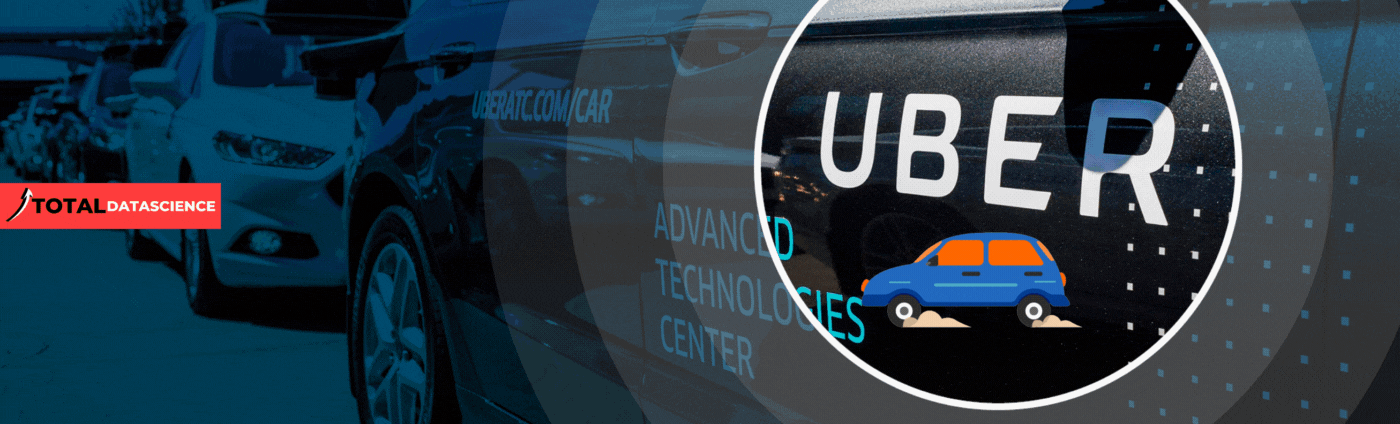

## Author: **MrBriit**

[Click here to follow me on Linkedin](https://www.linkedin.com/in/mrbriit/)

<br>

[Subscrice Youtube and Click on Notification button for more free tutorials and live sessons.](https://www.youtube.com/channel/UC7YlhTyLxk_B1ZcY8CUpCVQ?sub_confirmation=1)




#**Uber Data Analysis With Python**

**Uber Technologies, Inc.**, commonly known as **Uber**, is an American technology company. Its services include ride-hailing, food delivery, package delivery, couriers, freight transportation, and, through a partnership with Lime, electric bicycle and motorized scooter rental.

We will mainly use data regarding **Uber ride**


In this tutorial, we will use Python to analyze data from Uber.

By the end of this lesson, you will gain a hands-on experience with Python in analyzing data.

We will use Python to:


*   Check how long do people travel with Uber?
*   What Hour Do Most People Take Uber To Their Destination?
* Check The Purpose Of Trips
* Which Day Has The Highest Number Of Trips
* What Are The Number Of Trips Per Each Day?
* What Are The Trips In The Month
* The starting points of trips. Where Do People Start Boarding Their Trip From Most?





The dataset for this project is loaded at the resource session of this course.

You can also request access to your personal Uber [data here](https://myprivacy.uber.com/privacy/exploreyourdata/download)

<br>

##**Import The Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [ ]:
data=pd.read_csv('/content/Uber Drives - .csv')
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


##Check for Mising Values

If a data is not available, Python uses **NaN** to represnet it.

Let's check below if there data points missing in our dataset.

In [ ]:
data.isnull().any()

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

In [ ]:
data.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In this tutorial, we will drop all the NaN values in our dataset.

NOTE: Dropping a value in your dataset should be the last option to consider. There are better ways to deal with missing values in your dataset.

There is a detail and well explained tutorial on dealing with missing values and other featuring engineering techniques in [this tutorial.](https://datamentor.ai)

In [ ]:
data=data.dropna()

In [ ]:
data.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

Now we can see that there are not missing values in the dataset.

In [ ]:
data['START_DATE*'] = pd.to_datetime(data['START_DATE*'], format="%m/%d/%Y %H:%M")
data['END_DATE*'] = pd.to_datetime(data['END_DATE*'], format="%m/%d/%Y %H:%M")

In [ ]:
hour=[]
day=[]
dayofweek=[]
month=[]
weekday=[]
for x in data['START_DATE*']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])
data['HOUR']=hour
data['DAY']=day
data['DAY_OF_WEEK']=dayofweek
data['MONTH']=month
data['WEEKDAY']=weekday

In [ ]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


##**Categories We Have**

In [ ]:
data['CATEGORY*'].value_counts()

Business    647
Personal      6
Name: CATEGORY*, dtype: int64

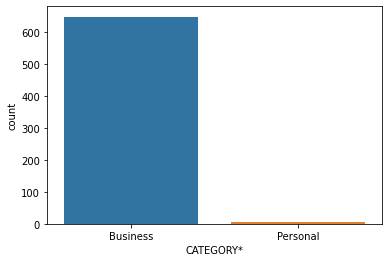

In [ ]:
sns.countplot(x='CATEGORY*',data=data)

We have large number of business rides caegory as against very few personal rides.

##**How long do people travel with Uber?**

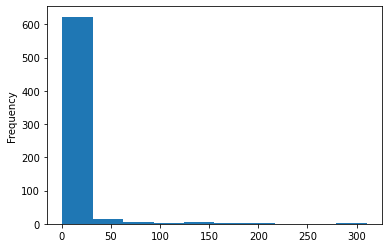

In [ ]:
data['MILES*'].plot.hist()

mostly people travel in a short mile with Uber.

##**What Hour Do Most People Take Uber To Their Destination?**

Text(0.5, 1.0, 'Number of trips Vs hours')

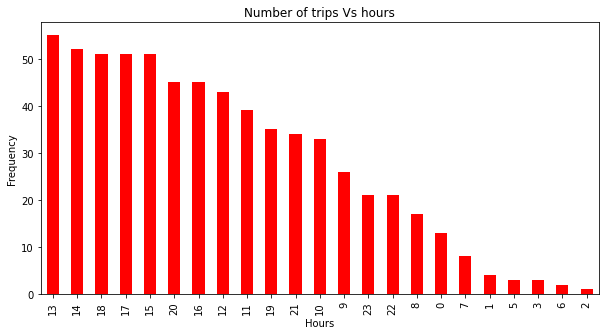

In [ ]:
hours = data['START_DATE*'].dt.hour.value_counts()
hours.plot(kind='bar',color='red',figsize=(10,5))
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of trips Vs hours')

As we can see most people take Uber to their destination around the 13th hour(1pm) and the least hour is 2 am.

#**Check The Purpose Of Trips**

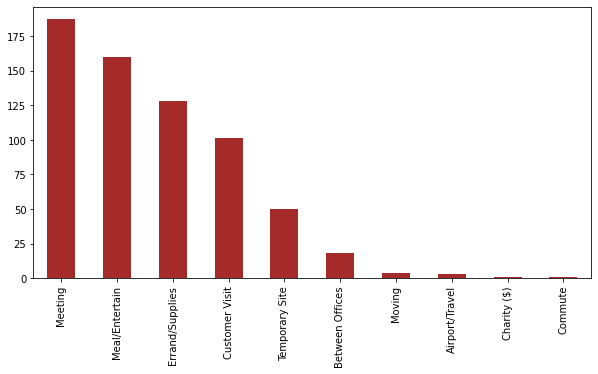

In [ ]:
data['PURPOSE*'].value_counts().plot(kind='bar',figsize=(10,5),color='brown')

We can notice that mostly the purpose of the trip is meeting and meal/entertain.

##**Which Day Has The Highest Number Of Trips**

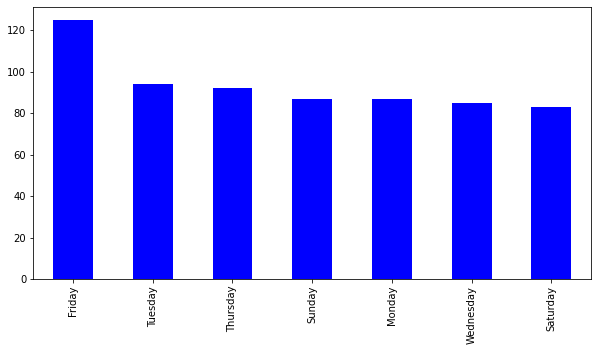

In [ ]:
data['WEEKDAY'].value_counts().plot(kind='bar',figsize=(10,5),color='blue')

So Friday has the highest number of Trips.

##**What Are The Number Of Trips Per Each Day?**

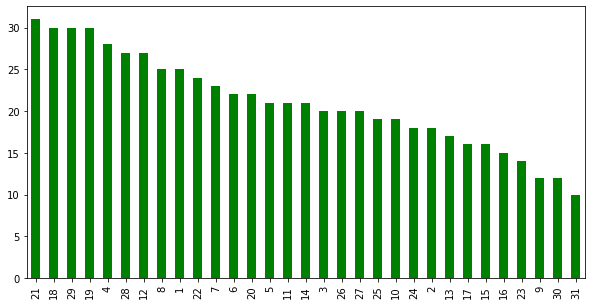

In [ ]:
data['DAY'].value_counts().plot(kind='bar',figsize=(10,5),color='green')

##**What Are The Trips In The Month**

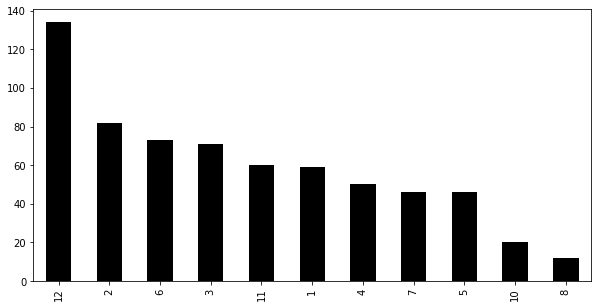

In [ ]:
data['MONTH'].value_counts().plot(kind='bar',figsize=(10,5),color='black')

We can see that December(12) has the most trips.

##**The starting points of trips. Where Do People Start Boarding Their Trip From Most?**

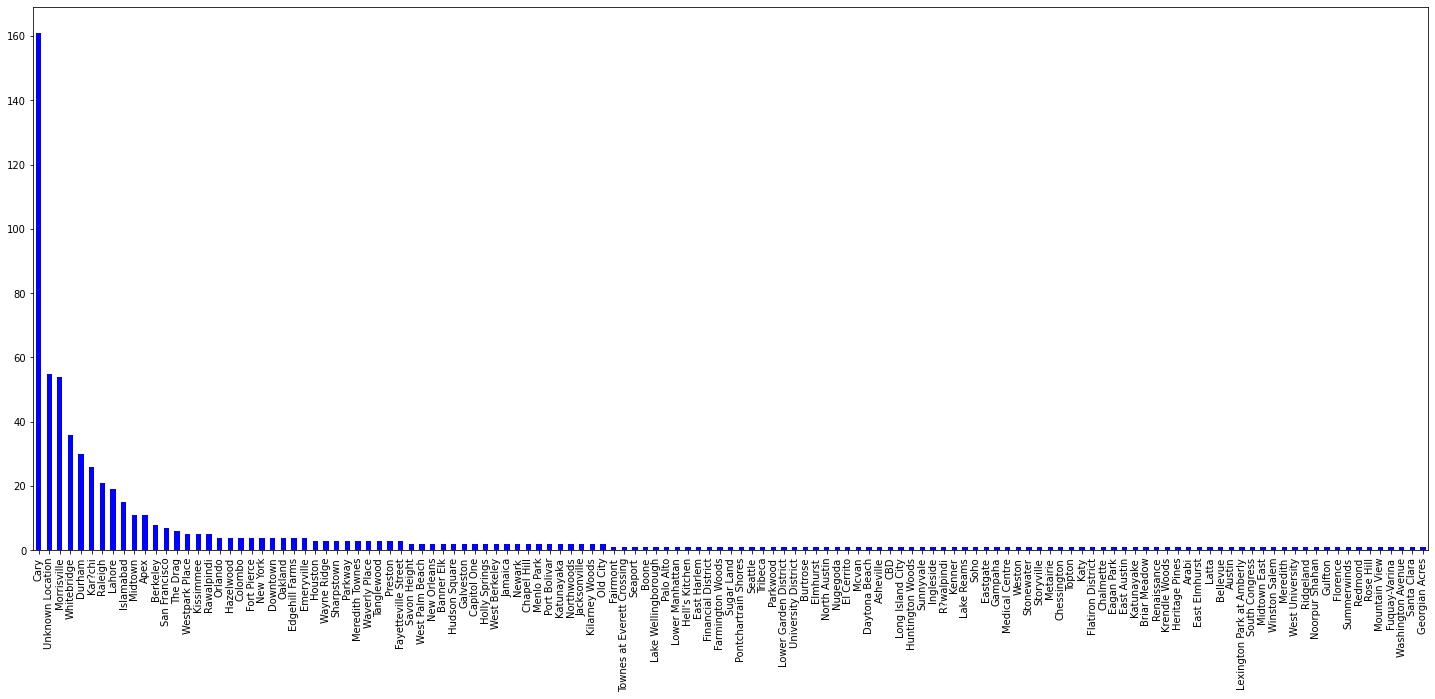

In [ ]:
data['START*'].value_counts().plot(kind='bar',figsize=(25,10),color='blue')

Most people in this dataset starts their journey from **Cary** followed by some unknown location and then Morrisville.